In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy import units as u
import astropy.coordinates as coord

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally

# Kepler planets

In [4]:
datadir='/home/prometheus/data/gaia/'
kep_data = Table.read(datadir+'kepler_dr2_4arcsec.fits', format='fits')

In [5]:
kep_data.info

<Table masked=True length=241989>
          name           dtype         unit       n_bad
----------------------- ------- ----------------- -----
                angDist float64            arcsec     0
                  kepid   int64                       0
              source_id   int64                       0
                ra_gaia float64               deg     0
               ra_error float64      0.001 arcsec     0
               dec_gaia float64               deg     0
              dec_error float64      0.001 arcsec     0
               parallax float64      0.001 arcsec     0
         parallax_error float64      0.001 arcsec     0
                   pmra float64 0.001 arcsec / yr     0
             pmra_error float64 0.001 arcsec / yr     0
                  pmdec float64 0.001 arcsec / yr     0
            pmdec_error float64 0.001 arcsec / yr     0
       phot_g_mean_flux float64            ph / s     0
 phot_g_mean_flux_error float64            ph / s     0
        phot_g

In [6]:
kep_data.columns.keys()

['angDist',
 'kepid',
 'source_id',
 'ra_gaia',
 'ra_error',
 'dec_gaia',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_bp_mean_flux',
 'phot_bp_mean_flux_error',
 'phot_bp_mean_mag',
 'phot_rp_mean_flux',
 'phot_rp_mean_flux_error',
 'phot_rp_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'teff_val',
 'a_g_val',
 'e_bp_min_rp_val',
 'radius_val',
 'lum_val',
 'tm_designation',
 'ra_kic',
 'dec_kic',
 'kepmag',
 'teff',
 'teff_err1',
 'teff_err2',
 'teff_prov',
 'logg',
 'logg_err1',
 'logg_err2',
 'logg_prov',
 'feh',
 'feh_err1',
 'feh_err2',
 'feh_prov',
 'radius',
 'radius_err1',
 'radius_err2',
 'mass',
 'mass_err1',
 'mass_err2',
 'prov_sec',
 'nconfp',
 'nkoi',
 'ntce',
 'jmag',
 'hmag',
 'kmag',
 'kepoi_name',
 'planet?']

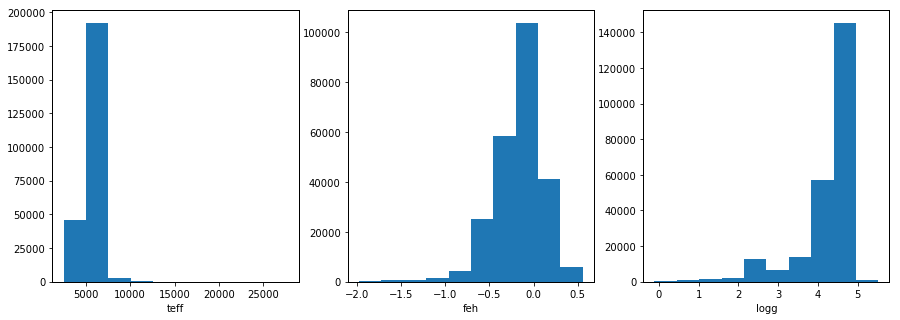

In [7]:
prop = ['teff','feh','logg']
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,p in enumerate(prop):
    name=str(p)
    ax[i].hist(kep_data[p]);
    ax[i].set_xlabel(name)

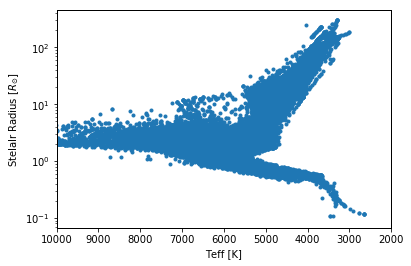

In [8]:
filter = kep_data['phot_g_mean_mag'] <= 14.

temp = kep_data['teff'][filter]*u.Kelvin
radius = kep_data['radius'][filter]* u.Rsun
plt.scatter(temp, radius, marker='.', cmap='viridis')
plt.yscale('log')
plt.xlabel('Teff [K]')
plt.xlim(10e3,2e3)
plt.ylabel('Stelalr Radius [$R_{\odot}$]')

In [9]:
kep_data['dist'] = 1.e3/kep_data['parallax']
kep_data['dist'].unit = u.pc
#convert kepler magnitude to gaia magnitude
kep_data['abs_gmag'] = kep_data['phot_g_mean_mag'] - \
                            5.*(np.log10(kep_data['dist']) - 1.)
kep_data['abs_gmag'].unit = u.mag

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [10]:
np.unique(kep_data['planet?'])

cand
conf
none


/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


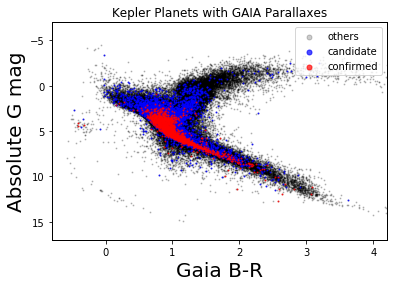

In [9]:
filter = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax'] > 0.1)
plt.scatter(kep_data['bp_rp'][filter], kep_data['abs_gmag'][filter], label='others',alpha=0.2, color='k', s=1)
filter2 = (kep_data['planet?'] == 'cand') & filter
#add Kepler planet candidates
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], label='candidate', alpha=0.7, s=1, color='b')
filter2 = (kep_data['planet?'] == 'conf') & filter
#add Kepler confirmed planets
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], label='confirmed', alpha=0.7, s=1, color='r')
plt.xlabel('Gaia B-R', fontsize=20)
plt.ylabel('Absolute G mag', fontsize=20)
plt.ylim([17,-7])
plt.xlim([-0.8,4.2])
plt.title('Kepler Planets with GAIA Parallaxes')
plt.legend(loc='upper right', fontsize=10, markerscale=5)
#plt.text(0.75,1.02,'gaia-kepler.fun', transform=plt.gca().transAxes)
plt.savefig('../img/colormag_kepler.png')

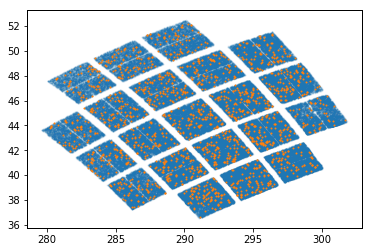

In [14]:
filter = kep_data['planet?'] == 'conf'
plt.scatter(kep_data['ra_gaia'],kep_data['dec_gaia'],alpha=0.1,s=1)
plt.scatter(kep_data[filter]['ra_gaia'],kep_data[filter]['dec_gaia'],s=1)

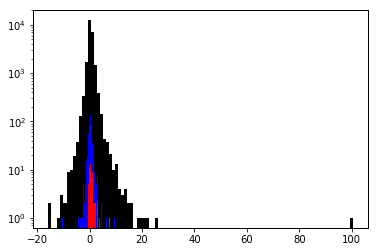

In [25]:
filter = (kep_data['phot_g_mean_mag'] >= 18.) & np.isfinite(kep_data['parallax'])
plt.hist(kep_data['parallax'][filter], bins=100, color='k');
filter2 = filter & (kep_data['planet?'] == 'cand')
plt.hist(kep_data['parallax'][filter2], bins=100, color='b');
filter2 = filter & (kep_data['planet?'] == 'conf')
plt.hist(kep_data['parallax'][filter2], bins=100, color='r');
plt.yscale('log')

# K2 planets

In [27]:
k2_data = Table.read(datadir+'k2_dr2_4arcsec.fits', format='fits')

In [28]:
np.unique(k2_data['k2c_disp'])

CANDIDATE
CONFIRMED
FALSE POSITIVE
N/A


In [29]:
k2_data['dist'] = 1.e3/k2_data['parallax']
k2_data['dist'].unit = u.pc
k2_data['abs_gmag'] = k2_data['phot_g_mean_mag'] - \
                            5.*(np.log10(k2_data['dist']) - 1.)
k2_data['abs_gmag'].unit = u.mag

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


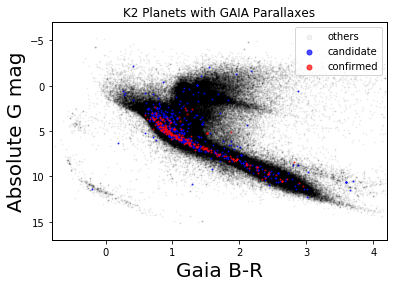

In [30]:
filter = (k2_data['phot_g_mean_mag'] <= 18.) & (k2_data['parallax'] > 0.1)
plt.scatter(k2_data['bp_rp'][filter], k2_data['abs_gmag'][filter], label='others', alpha=0.05, color='k', s=1)
#add k2 planet candidates
filter2 = (k2_data['k2c_disp'] == 'CANDIDATE') & filter
plt.scatter(k2_data['bp_rp'][filter2], k2_data['abs_gmag'][filter2], label='candidate', alpha=0.7, s=1, color='b')
#add k2 confirmed planets 
filter2 = (k2_data['k2c_disp'] == 'CONFIRMED') & filter
plt.scatter(k2_data['bp_rp'][filter2], k2_data['abs_gmag'][filter2], label='confirmed', alpha=0.7, s=1, color='r')
plt.xlabel('Gaia B-R', fontsize=20)
plt.ylabel('Absolute G mag', fontsize=20)
plt.ylim([17,-7])
plt.xlim([-0.8,4.2])
plt.title('K2 Planets with GAIA Parallaxes')
plt.legend(loc='upper right', fontsize=10, markerscale=5)
#plt.text(0.75,1.02,'gaia-kepler.fun', transform=plt.gca().transAxes)
plt.savefig('../img/colormag_k2.png')

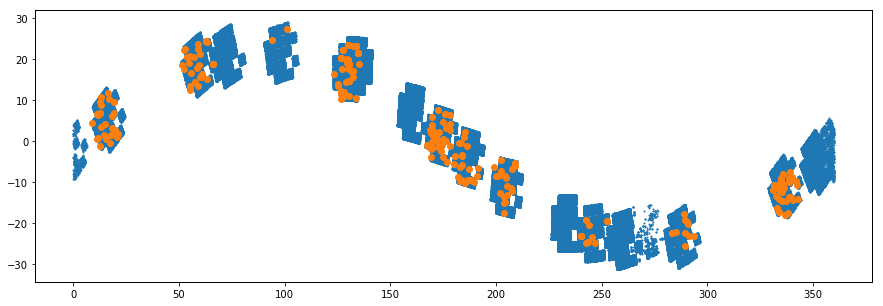

In [39]:
fig = plt.figure(figsize=(15,5))
filter = k2_data['k2c_disp'] == 'CONFIRMED'
plt.scatter(k2_data['ra_gaia'],k2_data['dec_gaia'],s=1)
plt.scatter(k2_data['ra_gaia'][filter],k2_data['dec_gaia'][filter])

# NExSci planets

In [41]:
datadir='/home/prometheus/data/gaia/'
nexsci_data = Table.read(datadir+'confirmed_dr2_4arcsec.fits', format='fits')

In [46]:
nexsci_data[i]

angDist,pl_name,source_id,ra_gaia,ra_error,dec_gaia,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra_nasa,st_raerr,dec_nasa,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate
arcsec,,,deg,0.001 arcsec,deg,0.001 arcsec,0.001 arcsec,0.001 arcsec,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,0.001 arcsec / yr,ph / s,ph / s,mag,ph / s,ph / s,mag,ph / s,ph / s,mag,mag,km / s,km / s,K,mag,mag,solRad,solLum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,str26,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str27,str1,str29,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,str14,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,str12,str12,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,int64,str11,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,str10
0.017243,11comb,3946945413106333696,185.178779278,0.162,17.7932516382,0.1317,10.7104,0.2197,-109.241,0.316,88.17,0.277,336025000.0,860954.0,4.372438,140929000.0,279609.0,4.97889,244018000.0,490175.0,3.793366,1.185524,43.37,0.21,4755.0,0.1887,0.1125,17.18,135.955,11 Com,b,Radial Velocity,1,326.03,0.32,-0.32,0,1,1.29,0.05,-0.05,0,2,0.231,0.005,-0.005,0,1,nan,nan,nan,--,0,19.4,1.5,-1.5,0,2,Msini,nan,nan,nan,--,0,nan,nan,nan,--,0,0,0,0,12h20m43.03s,+17d47m34.3s,185.179276,2e-06,17.792868,1e-06,2,110.62,9.61,-11.63,0,3,4.74,nan,0,V (Johnson),nan,nan,--,4742.0,100.0,-100.0,0,3,2.7,0.3,-0.3,0,3,19.0,2.0,-2.0,0,2,0,2014-05-14


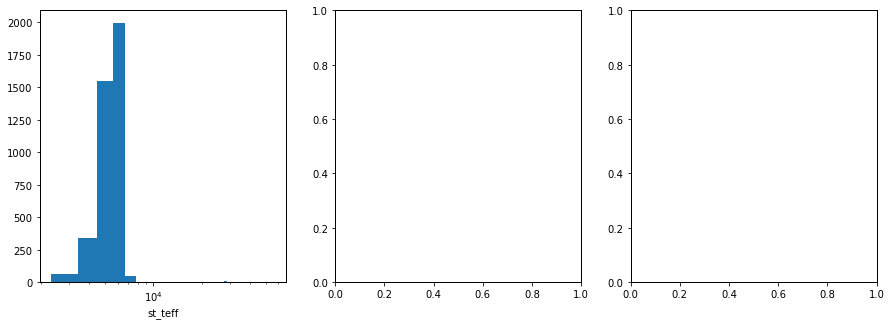

In [63]:
prop = ['st_teff','st_metfe','st_logg']
fig, ax = plt.subplots(1,3,figsize=(15,5))

for i,p in enumerate(prop):
    name=str(p)
    try:
        filter = np.isfinite(nexsci_data[p])
        ax[i].hist(nexsci_data[p][filter],bins=50);
        ax[i].set_xlabel(name)
        ax[i].set_xscale('log')
    except:
        pass

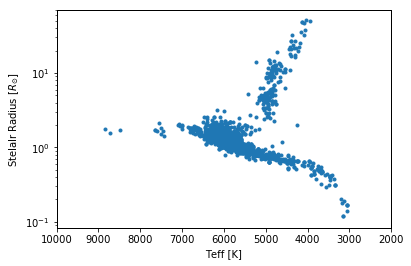

In [17]:
filter = nexsci_data['phot_g_mean_mag'] <= 14.

temp =nexsci_data['st_teff'][filter]*u.Kelvin
radius = nexsci_data['st_rad'][filter]* u.Rsun
plt.scatter(temp, radius, marker='.')
plt.yscale('log')
plt.xlabel('Teff [K]')
plt.xlim(10e3,2e3)
plt.ylabel('Stelalr Radius [$R_{\odot}$]')

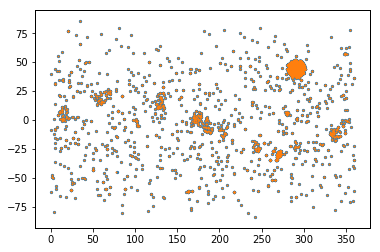

In [28]:
plt.scatter(nexsci_data['ra_gaia'],nexsci_data['dec_gaia'],s=5)
plt.scatter(nexsci_data['ra_nasa'],nexsci_data['dec_nasa'],s=1)

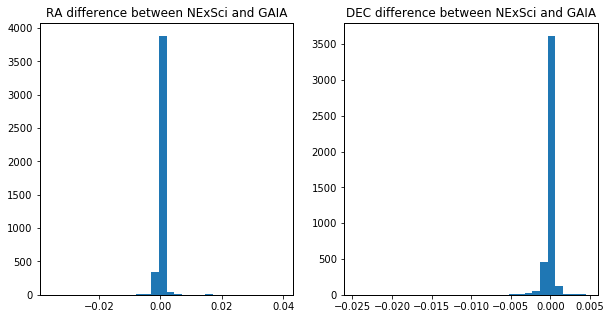

In [36]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(nexsci_data['ra_gaia']-nexsci_data['ra_nasa'],bins=30);
ax[0].set_title('RA difference between NExSci and GAIA')
ax[1].hist(nexsci_data['dec_gaia']-nexsci_data['dec_nasa'],bins=30);
ax[1].set_title('DEC difference between NExSci and GAIA')

In [64]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib import animation
from IPython.display import HTML
from astropy.time import Time

In [65]:
filter = (kep_data['phot_g_mean_mag'] >= 18.) & (kep_data['parallax'] > 0.01)
#filter = filter & (kep_data['planet?'] == 'cand')
tab = kep_data[filter]

/home/prometheus/miniconda3/envs/astroconda/lib/python3.6/site-packages/astropy/table/column.py:928: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


In [66]:
gaia_time = Time('2015-01-01')
tab['radial_velocity'][np.isnan(tab['radial_velocity'])] = 0.

In [67]:
amplitude = 1e5
tab['radial_velocity'] *= amplitude
tab['pmra'] *= amplitude
tab['pmdec'] *= amplitude
tab['parallax'] *= amplitude

In [69]:
def animfunc(t, xlim, ylim, ax):
    sclater = scnow.apply_space_motion(new_obstime=gaia_time + t * u.yr)
    
    ax.cla()
    ax.set_title('Kepler field, T={:,.0f} years'.format(t*amplitude), fontsize=18)
    s = ax.scatter(sclater.ra.deg, sclater.dec.deg, c=np.log10(sclater.distance.value), 
               **scatkwargs)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_ylabel('Right Ascension (degrees)', fontsize=16)
    ax.set_xlabel('Declination (degrees)', fontsize=16)
    ax.grid(alpha=.5)
    #cbar = fig.colorbar(s, ax=ax, ticks=[1,2,3,4,5])
    #cbar.ax.set_yticklabels(['10', '100', '1000', '10k', '100k'])  # vertically oriented colorbar
    #cbar.set_label('Distance (pc)', rotation=270)

In [70]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

scatkwargs = dict(alpha=.7, s=3, cmap='viridis')

times = np.linspace(-5., 0., 51)
times = np.append(times, np.zeros(20))
times = np.append(times, np.linspace(0., 5., 51))

anim1 = animation.FuncAnimation(fig, animfunc, times,
                                fargs=([275,305], [33,55], ax), 
                                interval=50)

plt.close(fig)
#HTML(anim1.to_html5_video())

In [30]:
anim1.save('kepler_propermotions.gif', dpi=80, writer='imagemagick')